## SO6 Operators

For the half filling case $n_i=2$, the dimension is $C_4^2=6$ for the local Hilbert space. A basis of the states on a single site can be chosen as: 
$$
\begin{aligned}
& |a\rangle=|12\rangle, \quad|b\rangle=|13\rangle, \quad|c\rangle=|14\rangle, \\
& |d\rangle=|23\rangle, \quad|e\rangle=|24\rangle, \quad|f\rangle=|34\rangle. \\
&
\end{aligned}
$$
where $|12\rangle=c_1^\dagger c_2^\dagger|0\rangle$. 

The 15 traceless $SU(4)$ spin generators can be written as 
$$
S_{\alpha\beta} = c_\alpha^\dagger c_\beta - \frac{1}{2} \delta_{\alpha\beta}
$$
where $\alpha,\beta=1,2,3,4$. Let us carry out the matrix representation of these generators under the basis above. 

The diagonal terms are $S_{\alpha\alpha} = c_\alpha^\dagger c_\alpha - \frac{1}{2}$. One should calculate a large amount of expectations like $\langle a | c_1^\dagger c_1 | a\rangle$. For every $\alpha$ there are $6\times 6=36$ entries await. Thus it is better to accelerate it with a code. 

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

def oprs_on_ket(oprs_original, ket):
    """
    Inputs: 
        1. oprs_original, list of strings, the operators in the middle
        2. ket, list of strings, the ket

    Outputs:
        1. coe, the coefficient, 1 or -1 or 0
        2. ket, list of strings or zero(integer), the result of application of operators
    """

    oprs = deepcopy(oprs_original)
    assert len(oprs) != 0 #there must be at least one operator inside list oprs
    coe = 1

    while len(oprs) != 0:
        opr = oprs[-1]

        if opr.endswith('d'): #creation operator
            opr = opr[:-1] #cut the 'd' in the end
            if any(opr in _ for _ in ket): #if opr is already in ket
                ket = 0
                return 0, ket #return (0,0)
            else: #opr is not in ket
                ket.insert(0,opr)
        else: #annihilation operator
            if any(opr in _ for _ in ket): 
                index = ket.index(opr) #index is the number of particles 'before' opr
                coe *= (-1)**index
                ket.remove(opr)
            else:
                ket = 0
                return 0, ket #return (0,0)
        oprs = oprs[:-1] #cut the operator in oprs after application
    return coe, ket

def get_ket_from_6states(n):
    if n == 1:
        return ['1','2']
    elif n == 2:
        return ['1','3']
    elif n == 3:
        return ['1','4']
    elif n == 4:
        return ['2','3']
    elif n == 5:
        return ['2','4']
    elif n == 6:
        return ['3','4']
    else:
        raise("Out of 6 states. ")

def S_representation_matrix(alpha, beta):
    if type(alpha) != int or type(beta) != int or alpha>4 or alpha<1 or beta>4 or beta<1:
        raise("Check your alpha and beta. They must be 1,2,3,4. ")
    S_mat = np.zeros((6,6))
    for left in range(1,7):
        bra = get_ket_from_6states(left)
        oprs = [str(alpha)+'d', str(beta)]
        oprs.insert(0, bra[0])
        oprs.insert(0, bra[1]) #put the annihilation operators in the front of oprs
        for right in range(1,7):
            ket = get_ket_from_6states(right)
            coe, ket = oprs_on_ket(oprs, ket)
            if ket == []:
                S_mat[left-1, right-1] = coe
            elif ket == 0:
                S_mat[left-1, right-1] = 0
            else:
                raise('something wrong')
    if alpha==beta:
        S_mat -= (1/2)*np.diag([1,1,1,1,1,1])
    return S_mat

In [2]:
#test of function 'oprs_on_ket'
operators = ['3','2','1d','1']
state = ['2','3']

oprs_on_ket(operators, state)

(0, 0)

In [3]:
for a in range(1,5):
    for b in range(1,5):
        print("S",a,b,"matrix is")
        print(S_representation_matrix(a,b))

S 1 1 matrix is
[[ 0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.   0.   0. ]
 [ 0.   0.   0.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.  -0.5]]
S 1 2 matrix is
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
S 1 3 matrix is
[[ 0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
S 1 4 matrix is
[[ 0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
S 2 1 matrix is
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
S 2 2 matrix is
[[ 0.5  0.   0.   0.   0.   0. ]
 [ 0.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.5  0. 

### The Cartan sub-algebra

As we can see the 4 diagonal generators are: 

$$
S_{11}=\left(\begin{array}{cccccc}
0.5 & 0 & 0 & 0 & 0 & 0 \\
0 & 0.5 & 0 & 0 & 0 & 0 \\
0 & 0 & 0.5 & 0 & 0 & 0 \\
0 & 0 & 0 & -0.5 & 0 & 0 \\
0 & 0 & 0 & 0 & -0.5 & 0 \\
0 & 0 & 0 & 0 & 0 & -0.5
\end{array}\right),\quad S_{22}=\left(\begin{array}{cccccc}
0.5 & 0 & 0 & 0 & 0 & 0 \\
0 & -0.5 & 0 & 0 & 0 & 0 \\
0 & 0 & -0.5 & 0 & 0 & 0 \\
0 & 0 & 0 & 0.5 & 0 & 0 \\
0 & 0 & 0 & 0 & 0.5 & 0 \\
0 & 0 & 0 & 0 & 0 & -0.5
\end{array}\right),\quad S_{33}=\left(\begin{array}{cccccc}
-0.5 & 0 & 0 & 0 & 0 & 0 \\
0 & 0.5 & 0 & 0 & 0 & 0 \\
0 & 0 & -0.5 & 0 & 0 & 0 \\
0 & 0 & 0 & 0.5 & 0 & 0 \\
0 & 0 & 0 & 0 & -0.5 & 0 \\
0 & 0 & 0 & 0 & 0 & 0.5
\end{array}\right),\quad S_{44}=\left(\begin{array}{cccccc}
-0.5 & 0 & 0 & 0 & 0 & 0 \\
0 & -0.5 & 0 & 0 & 0 & 0 \\
0 & 0 & 0.5 & 0 & 0 & 0 \\
0 & 0 & 0 & -0.5 & 0 & 0 \\
0 & 0 & 0 & 0 & 0.5 & 0 \\
0 & 0 & 0 & 0 & 0 & 0.5
\end{array}\right). 
$$

It is obvious that only 3 out of 4 are linear independent, namely $S_{44}=-S_{11}-S_{22}-S_{33}$. The dimension of the Cartan sub-algebra of Lie algebra $\mathfrak{su}(4)$ is $4-1=3$, it is also the rank of Lie group $SU(4)$. So we can construct the Cartan sub-algebra by the first 3 diagonal generators. But LA.norm() of these 3 generators are not sqrt(2). In order to obtain the Cartan sub-algebra, we should perform the Schimidt orthogonalization first. 


In [4]:
import numpy.linalg as LA

def gram_schmidt(A):
    Q, _ = LA.qr(A)
    return Q

def schmidt_to_cartan_subalgebra(S1,S2,S3):
    A = np.array([S1.flatten(), S2.flatten(), S3.flatten()])
    Q = gram_schmidt(A.T).T

    B1 = Q[0].reshape(6, 6)
    B2 = Q[1].reshape(6, 6)
    B3 = Q[2].reshape(6, 6)

    C1 = B1 * np.sqrt(2 / np.trace(B1 @ B1.T))
    C2 = B2 * np.sqrt(2 / np.trace(B2 @ B2.T))
    C3 = B3 * np.sqrt(2 / np.trace(B3 @ B3.T))

    return C1, C2, C3

The function "schmidt_to_cartan_subalgebra" brings three unorthogonalized matrices into Gram-Schmidt orthogonalization process. 

In [5]:
C1, C2, C3 = schmidt_to_cartan_subalgebra(S_representation_matrix(1,1), S_representation_matrix(2,2), S_representation_matrix(3,3))

cc1 = np.diag([-1,-1,-1, 1, 1, 1])/np.sqrt(3)
cc2 = np.diag([-2, 1, 1,-1,-1, 2])/np.sqrt(6)
cc3 = np.diag([ 0,-1, 1,-1, 1, 0])/np.sqrt(2)

print('C1', C1, np.allclose(C1,cc1))
print('C2', C2, np.allclose(C2,cc2))
print('C3', C3, np.allclose(C3,cc3))

C1 [[-0.57735027 -0.         -0.         -0.         -0.         -0.        ]
 [-0.         -0.57735027 -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.57735027 -0.         -0.         -0.        ]
 [-0.         -0.         -0.          0.57735027 -0.         -0.        ]
 [-0.         -0.         -0.         -0.          0.57735027 -0.        ]
 [-0.         -0.         -0.         -0.         -0.          0.57735027]] True
C2 [[-0.81649658  0.         -0.         -0.         -0.         -0.        ]
 [-0.          0.40824829 -0.         -0.         -0.         -0.        ]
 [-0.         -0.          0.40824829 -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.40824829 -0.         -0.        ]
 [-0.         -0.         -0.         -0.         -0.40824829 -0.        ]
 [-0.         -0.         -0.         -0.         -0.          0.81649658]] True
C3 [[ 5.25581098e-17 -3.14018492e-16  0.00000000e+00  0.00000000e+00
   0.00000000

### Symmetry of switching 4 fermions

As a validation to the result of generators, switching the order of 4 fermions does not change the Hamiltonian and the zero trace of generators. For all half occupied combinations of 4 fermions, we can arrange the order of 4 fermions to get $A_4^4 = 24$ possibilities. 

In [6]:
import itertools

def get_ket_from_6states_with_order(n, arrange_order):
    """
    Inputs:
        1. n, int, the 2-occupied states, 1 to 6 for a to f
        2. arrange_order, list of str, the arrange order of '1234'
        
    Output:
        1. ket, str, ordered 2-occupied states
    """
    
    if n == 1:
        return [arrange_order[0], arrange_order[1]]
    elif n == 2:
        return [arrange_order[0], arrange_order[2]]
    elif n == 3:
        return [arrange_order[0], arrange_order[3]]
    elif n == 4:
        return [arrange_order[1], arrange_order[2]]
    elif n == 5:
        return [arrange_order[1], arrange_order[3]]
    elif n == 6:
        return [arrange_order[2], arrange_order[3]]
    else:
        raise("Out of 6 states. ")
    
def arrange_four_fermions():
    chars = ['1', '2', '3', '4']
    permutations = itertools.permutations(chars)
    return [list(_) for _ in permutations]

def S_representation_matrix_with_order(alpha, beta, arrange_order):
    if type(alpha) != int or type(beta) != int or alpha>4 or alpha<1 or beta>4 or beta<1:
        raise("Check your alpha and beta. They must be 1,2,3,4. ")
    S_mat = np.zeros((6,6))
    for left in range(1,7):
        bra = get_ket_from_6states_with_order(left, arrange_order)
        oprs = [str(alpha)+'d', str(beta)]
        oprs.insert(0, bra[0])
        oprs.insert(0, bra[1])
        for right in range(1,7):
            ket = get_ket_from_6states_with_order(right, arrange_order)
            coe, ket = oprs_on_ket(oprs, ket)
            if ket == []:
                S_mat[left-1, right-1] = coe
            elif ket == 0:
                S_mat[left-1, right-1] = 0
            else:
                raise('something wrong')
    if alpha==beta:
        S_mat -= (1/2)*np.diag([1,1,1,1,1,1])
    return S_mat

all_four_fermion_arrange = arrange_four_fermions()

#zero trace must be kept for all permutations
for four_fermion in all_four_fermion_arrange:
    print("fermion order", four_fermion)
    for a in range(1,5):
        for b in range(1,5):
            print("trace of S",a,b, 'is', np.trace(S_representation_matrix_with_order(a,b, four_fermion)))
    print(" ")

fermion order ['1', '2', '3', '4']
trace of S 1 1 is 0.0
trace of S 1 2 is 0.0
trace of S 1 3 is 0.0
trace of S 1 4 is 0.0
trace of S 2 1 is 0.0
trace of S 2 2 is 0.0
trace of S 2 3 is 0.0
trace of S 2 4 is 0.0
trace of S 3 1 is 0.0
trace of S 3 2 is 0.0
trace of S 3 3 is 0.0
trace of S 3 4 is 0.0
trace of S 4 1 is 0.0
trace of S 4 2 is 0.0
trace of S 4 3 is 0.0
trace of S 4 4 is 0.0
 
fermion order ['1', '2', '4', '3']
trace of S 1 1 is 0.0
trace of S 1 2 is 0.0
trace of S 1 3 is 0.0
trace of S 1 4 is 0.0
trace of S 2 1 is 0.0
trace of S 2 2 is 0.0
trace of S 2 3 is 0.0
trace of S 2 4 is 0.0
trace of S 3 1 is 0.0
trace of S 3 2 is 0.0
trace of S 3 3 is 0.0
trace of S 3 4 is 0.0
trace of S 4 1 is 0.0
trace of S 4 2 is 0.0
trace of S 4 3 is 0.0
trace of S 4 4 is 0.0
 
fermion order ['1', '3', '2', '4']
trace of S 1 1 is 0.0
trace of S 1 2 is 0.0
trace of S 1 3 is 0.0
trace of S 1 4 is 0.0
trace of S 2 1 is 0.0
trace of S 2 2 is 0.0
trace of S 2 3 is 0.0
trace of S 2 4 is 0.0
trace of S 

In [7]:
list_of_generators = dict()

for alpha in range(1,5):
    for beta in range(1,5):
        list_of_generators[(alpha,beta)] = S_representation_matrix(alpha,beta)

Let us calculate the terms in Hamiltonian is $\mathrm{Tr}(S(i)S(j))=S^\alpha_{~\beta}(i)S^\beta_{~\alpha}(j)$. But with all 16 $S$ matrices. 

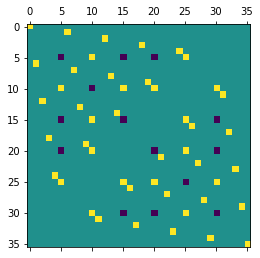

In [8]:
ham1 = np.zeros((36,36))
for a in range (1,5):
    for b in range(a,5):
        if a!=b:
            ham1 += np.kron( list_of_generators[(a,b)], list_of_generators[(b,a)] )
            ham1 += np.kron( list_of_generators[(b,a)], list_of_generators[(a,b)] )
        elif a == b:
            ham1 += np.kron( list_of_generators[(a,a)], list_of_generators[(a,a)] )

ham1 = ham1.reshape((6,6,6,6))

plt.matshow(ham1.reshape(36,36))
plt.show()

Using the orthogonalized diagonal matrices, do the calculation once again. The result should be the same. 

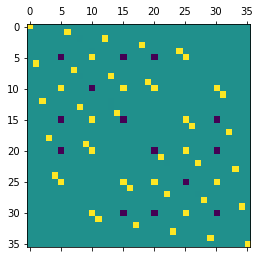

True

In [9]:
list_of_generators[(1,1)] = C1
list_of_generators[(2,2)] = C2
list_of_generators[(3,3)] = C3

ham11 = np.zeros((36,36))
for a in range (1,5):
    for b in range(a,5):
        if a!=b:
            ham11 += np.kron( list_of_generators[(a,b)], list_of_generators[(b,a)] )
            ham11 += np.kron( list_of_generators[(b,a)], list_of_generators[(a,b)] )
        elif a == b and a < 4: #don't get the last S involved
            ham11 += np.kron( list_of_generators[(a,a)], list_of_generators[(a,a)] )

ham11 = ham11.reshape((6,6,6,6))

plt.matshow(ham11.reshape(36,36))
plt.show()

np.allclose(ham1, ham11, atol=1e-8)

Now change the order of 4-fermion basis, this should give the same result. 

In [10]:
order = ['1','2','4','3']

C1, C2, C3 = schmidt_to_cartan_subalgebra(S_representation_matrix_with_order(1,1,order), S_representation_matrix_with_order(2,2,order), S_representation_matrix_with_order(3,3,order))

list_of_generators2 = dict()

for alpha in range(1,5):
    for beta in range(1,5):
        list_of_generators2[(alpha,beta)] = S_representation_matrix_with_order(alpha,beta,order)

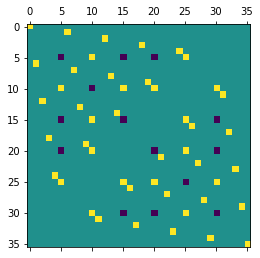

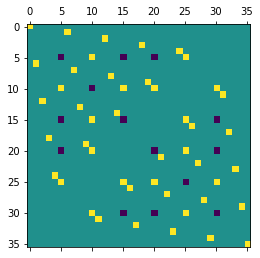

True

In [11]:
ham2 = np.zeros((36,36))
counter = 0
for a in range(1,5):
    for b in range(a,5):
        if a != b:
            ham2 += np.kron(list_of_generators2[(a,b)], list_of_generators2[(b,a)])
            ham2 += np.kron(list_of_generators2[(b,a)], list_of_generators2[(a,b)])
            counter += 2
        elif a == b:
            ham2 += np.kron(list_of_generators2[(a,a)], list_of_generators2[(a,a)])
            counter += 1

ham2 = np.reshape(ham2, (6,6,6,6))

plt.matshow(ham1.reshape(36,36))
plt.show()

plt.matshow(ham2.reshape(36,36))
plt.show()

np.allclose(ham1,ham2, atol=1e-8)

Let us take a look at the non-zero entries in the Hamiltonian tensor. The Hamiltonian 'ham1' is a $36\times 36$ matrix reshaped into $6\times 6\times 6\times 6$ tensor. It is important to clearify all the indices as legs in the tensor network language. 

The Hamiltonian 'ham' is given by $\mathrm{Tr}(S(i)S(j)) = S^\alpha_{~\beta}(i)S^\beta_{~\alpha}(j)$. For $\alpha,\beta=1,2,3,4$, there are totally 16 terms inside the Einstein notation. The indices of $(6,6,6,6)$ are belong to site $(i,j,i,j)$. 

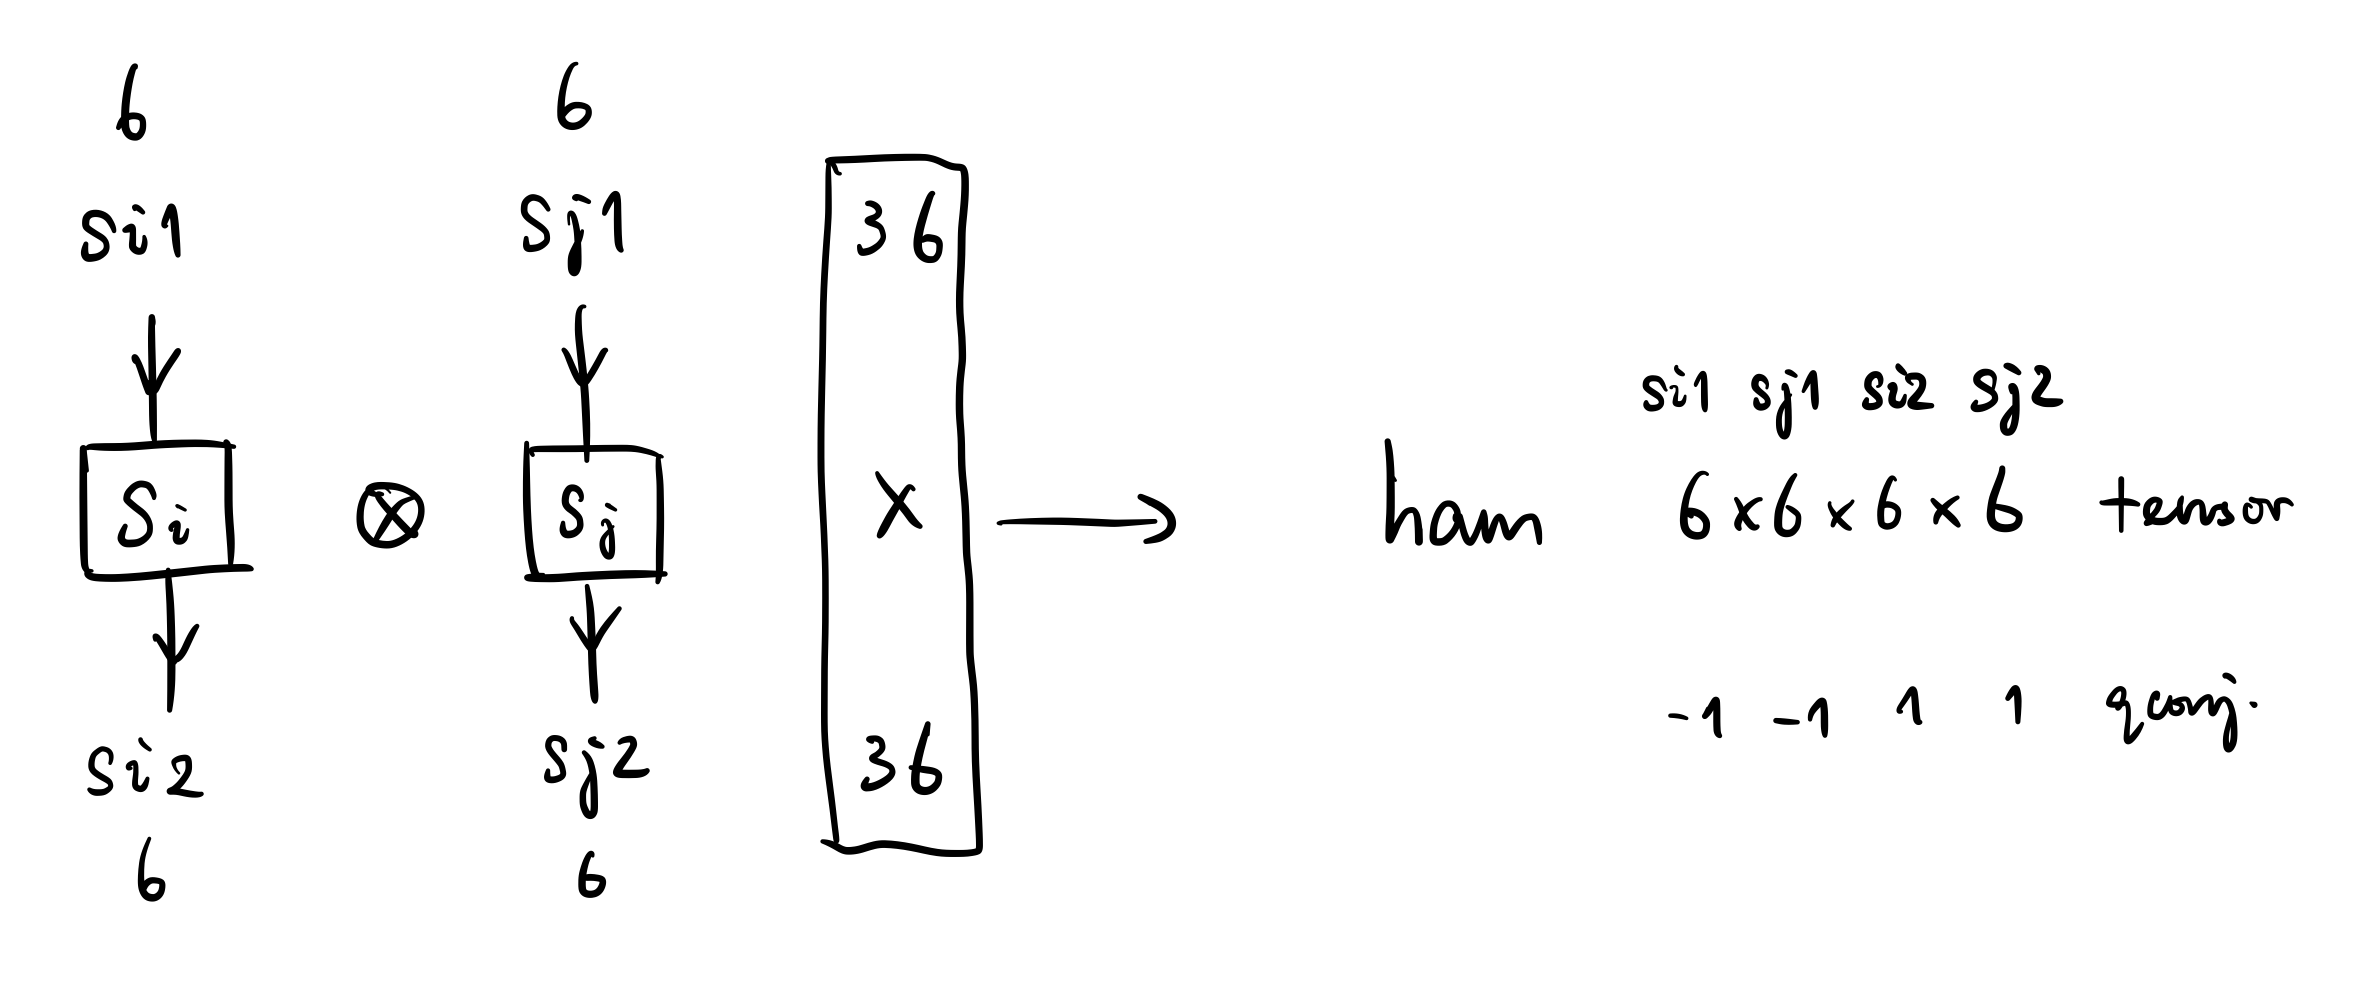

Every producted operator is going to change state $|si2\rangle_i|sj2\rangle_j$ into $|si1\rangle_i|sj1\rangle_j$. 

In [12]:
for a in range(6):
    for b in range(6):
        for c in range(6):
            for d in range(6):
                if abs(ham1[a,b,c,d]) > 1e-8:
                    print(a,b,c,d, ham1[a, b, c, d] )

0 0 0 0 1.0
0 1 1 0 1.0
0 2 2 0 1.0
0 3 3 0 1.0
0 4 4 0 1.0
0 5 0 5 -1.0
0 5 1 4 1.0
0 5 2 3 -1.0
0 5 3 2 -1.0
0 5 4 1 1.0
1 0 0 1 1.0
1 1 1 1 1.0
1 2 2 1 1.0
1 3 3 1 1.0
1 4 0 5 1.0
1 4 1 4 -1.0
1 4 2 3 1.0
1 4 3 2 1.0
1 4 5 0 1.0
1 5 5 1 1.0
2 0 0 2 1.0
2 1 1 2 1.0
2 2 2 2 1.0
2 3 0 5 -1.0
2 3 1 4 1.0
2 3 2 3 -1.0
2 3 4 1 1.0
2 3 5 0 -1.0
2 4 4 2 1.0
2 5 5 2 1.0
3 0 0 3 1.0
3 1 1 3 1.0
3 2 0 5 -1.0
3 2 1 4 1.0
3 2 3 2 -1.0
3 2 4 1 1.0
3 2 5 0 -1.0
3 3 3 3 1.0
3 4 4 3 1.0
3 5 5 3 1.0
4 0 0 4 1.0
4 1 0 5 1.0
4 1 2 3 1.0
4 1 3 2 1.0
4 1 4 1 -1.0
4 1 5 0 1.0
4 2 2 4 1.0
4 3 3 4 1.0
4 4 4 4 1.0
4 5 5 4 1.0
5 0 1 4 1.0
5 0 2 3 -1.0
5 0 3 2 -1.0
5 0 4 1 1.0
5 0 5 0 -1.0
5 1 1 5 1.0
5 2 2 5 1.0
5 3 3 5 1.0
5 4 4 5 1.0
5 5 5 5 1.0


### The trace

As we can see, there are several types of combinations calling non-zero entries. Remember, the indices 0 to 5 correspond to the 6 half-filling states $|12\rangle, |13\rangle, |14\rangle, |23\rangle, |24\rangle, |34\rangle$. 

1. $(a,a,a,a)=1$. Contributions of diagonal terms, 1/4 each. 

2. $(a,b,b,a)=1$, only for $|a\rangle$ and $|b\rangle$ have only 1 same fermion(one of the orginal 4 fermions, e.g. $(1,3,3,1)=1$ where $|1\rangle = |13\rangle$ and $|3\rangle = |23\rangle$ have a same $3$ fermion). Contributions of diagonal terms canceled, 1 from off diagonal term. For example, for $(0,4,4,0)$ i.e. $|24\rangle_i |12\rangle_j \rightarrow |12\rangle_i|24\rangle_j$. The term $S^1_{~4}(i) S^4_{~1}(j) = c_{1i}^\dagger c_{4i} c_{4j}^\dagger c_{1j}$ will give $\langle 12|_i\langle 24|_j S^1_{~4}(i) S^4_{~1}(j) |24\rangle_i |12\rangle_j = 1$. One can breaks the process down to three steps:
    1) $|24\rangle_i |12\rangle_j \rightarrow |42\rangle_i|12\rangle_j$ gives -1 coefficient for changing the fermion order on site $i$. 
    2) $|42\rangle_i |12\rangle_j \rightarrow |12\rangle_i|42\rangle_j$ gives 1 coefficient because changing the first fermions on different sites does not change the sign. 
    3) $|12\rangle_i |42\rangle_j \rightarrow |12\rangle_i|24\rangle_j$ gives -1 coefficient for changing the fermion order on site $j$.

3. $(a,b,a,b)=-1$, only for $|a\rangle$ and $|b\rangle$ have no same fermion. Contributions of diagonal terms, -1/4 each. 

4. $(a,b,c,d)=\pm 1$. For example, $(5,0,1,4)=1$. This is a process of $|13\rangle_i |24\rangle_j \rightarrow |34\rangle_i |12\rangle_j$, broken down to 
    1) $|13\rangle_i |24\rangle_j \rightarrow |13\rangle_i |42\rangle_j$, gives -1 coefficient. 
    2) $|13\rangle_i |42\rangle_j \rightarrow |43\rangle_i |12\rangle_j$, gives 1 coefficient. 
    3) $|43\rangle_i |12\rangle_j \rightarrow |34\rangle_i |12\rangle_j$, gives -1 coefficient. 

    For another example, $(5,0,2,3)=-1$. This is a process of $|14\rangle_i |23\rangle_j \rightarrow |34\rangle_i |12\rangle_j$, broken down to 
    1) $|14\rangle_i |23\rangle_j \rightarrow |14\rangle_i |32\rangle_j$, gives -1 coefficient. 
    2) $|14\rangle_i |32\rangle_j \rightarrow |34\rangle_i |12\rangle_j$, gives 1 coefficient. 

### The biquadratic terms

For the biquadratic terms in the Hamiltonian

$$
\left(\sum_{a, b} S_b^a(i) \otimes S_a^b(j)\right)^2= \sum_{a,b=1}^4 \sum_{c,d=1}^4 \left[S_b^a(i)\otimes S_a^b(j)\right]\left[S_d^c(i) \otimes S_c^d(j)\right]=\sum_{a,b=1}^4 \sum_{c,d=1}^4\left[S_b^a(i) S_d^c(i)\right]\otimes\left[S_a^b(j) S_c^d(j)\right]
$$

And we should list the 15 generators we got so far
$$
S^{1}_{~1}=\frac{1}{\sqrt{3}}\left(\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & -1
\end{array}\right), \quad 
S^{2}_{~2}=\frac{1}{\sqrt{6}}\left(\begin{array}{cccccc}
-2 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 2
\end{array}\right), \quad
S^{3}_{~3}=\frac{1}{\sqrt{2}}\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right),
$$

$$
S^{1}_{~2}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
S^{1}_{~3}=\left(\begin{array}{cccccc}
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
S^{1}_{~4}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right),
$$

$$
S^{2}_{~1}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
S^{2}_{~3}=\left(\begin{array}{cccccc}
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
S^{2}_{~4}=\left(\begin{array}{cccccc}
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right),
$$

$$
S^{3}_{~1}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
-1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0
\end{array}\right), \quad
S^{3}_{~2}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0
\end{array}\right), \quad
S^{3}_{~4}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), 
$$

$$
S^{4}_{~1}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
-1 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 & 0 & 0
\end{array}\right), \quad
S^{4}_{~2}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0
\end{array}\right), \quad
S^{4}_{~3}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right).
$$

Next we are going to find the set of operators that can linear expand both bilinear terms and biquadratic terms. For bilinear terms, the 15 generators are enough. But as for the biquadratics, $S^a_b(i) S^c_d(i)$ gives $4\times 4\times 4\times 4=256$ possibilities. Our goal is to find the maximum linear independent set of these biquadratic terms. 

In [13]:
su4g = dict() #the dictionary of S^\alpha_\beta
for alpha in range(1,5):
    for beta in range(1,5):
        su4g[(alpha,beta)] = S_representation_matrix(alpha,beta)

so6g = [] #start with 15 generators
coe_list = [] #the coefficient list, list of str
for alpha in range(1,5):
    for beta in range(1,5):
        if not(alpha==4 and beta==4):
            so6g.append(S_representation_matrix(alpha,beta))
so6g[0] = C1; so6g[5] = C2; so6g[10] = C3

import numpy.linalg as LA

for a in range(1,5):
    for b in range(1,5):
        for c in range(1,5):
            for d in range(1,5):
                SiSi = su4g[(a,b)] @ su4g[(c,d)]
                Amat = np.zeros((36, len(so6g)))
                B = SiSi.reshape(-1,1)
                for l in range(len(so6g)):
                    Amat[:,l] = so6g[l].reshape(-1,1)[:,0]
                #print("a,b,c,d",a,b,c,d,'shape of equation', Amat.shape, B.shape)
                pcoe, resi, rank, sing = LA.lstsq(Amat, B, rcond=None)
                #print("shape of coe", coe.shape)
                if len(resi)!=0 and resi[0]>1e-10: #no solution
                    so6g.append(SiSi)
                    print("a,b,c,d",a,b,c,d,"New added to so6g, now we have",len(so6g),'operators. ')
                    pcoe = np.append(np.zeros((len(so6g)-1, 1)),1).reshape(len(so6g),1)
                    coe_list.append(pcoe)
                else:
                    coe_list.append(pcoe)

a,b,c,d 1 1 1 1 New added to so6g, now we have 16 operators. 
a,b,c,d 1 1 2 2 New added to so6g, now we have 17 operators. 
a,b,c,d 1 1 2 3 New added to so6g, now we have 18 operators. 
a,b,c,d 1 1 2 4 New added to so6g, now we have 19 operators. 
a,b,c,d 1 1 3 2 New added to so6g, now we have 20 operators. 
a,b,c,d 1 1 3 3 New added to so6g, now we have 21 operators. 
a,b,c,d 1 1 3 4 New added to so6g, now we have 22 operators. 
a,b,c,d 1 1 4 2 New added to so6g, now we have 23 operators. 
a,b,c,d 1 1 4 3 New added to so6g, now we have 24 operators. 
a,b,c,d 1 2 2 3 New added to so6g, now we have 25 operators. 
a,b,c,d 1 2 2 4 New added to so6g, now we have 26 operators. 
a,b,c,d 1 2 3 3 New added to so6g, now we have 27 operators. 
a,b,c,d 1 2 3 4 New added to so6g, now we have 28 operators. 
a,b,c,d 1 2 4 3 New added to so6g, now we have 29 operators. 
a,b,c,d 1 3 2 4 New added to so6g, now we have 30 operators. 
a,b,c,d 2 1 3 2 New added to so6g, now we have 31 operators. 
a,b,c,d 

Then we found All the 36 linear independent operators including the identity matrix. Next we are going to represent the biquadratic term by the linear combinations of these 36 on-site operators. Which is finding coefficients of the expansion

$$
\left[ \mathrm{Tr}\left( S(i)\otimes S(j) \right) \right]^2 = \sum_{m,n} c_{mn} \lambda^m(i)\otimes\lambda^n(j)
$$

In the latest block, we have this decomposition done

$$
S^a_{~b}(i) S^c_{~d}(i) = \sum_{m=1}^{36} p_m(a,b,c,d) \lambda^m(i)
$$

where $\lambda^m$ is operators in the 36 linear independent operator set, and the coefficients $p_m$ are determined by the given order of $a,b,c,d$. Thus

$$
S^a_{~b}(i) S^c_{~d}(i) \otimes S^b_{~a}(j) S^d_{~c}(j) = \sum_{m=1}^{36}\sum_{n=1}^{36} p_m(a,b,c,d)p_n(b,a,d,c) \lambda^m(i)\otimes\lambda^n(j)
$$

Then go on to

$$
\left[ \mathrm{Tr}\left( S(i)\otimes S(j) \right) \right]^2 = \sum_{a,b=1}^4 \sum_{c,d=1}^4 S^a_{~b}(i) S^c_{~d}(i) \otimes S^b_{~a}(j) S^d_{~c}(j) = \sum_{m=1}^{36}\sum_{n=1}^{36} \sum_{a,b=1}^4 \sum_{c,d=1}^4 p_m(a,b,c,d)p_n(b,a,d,c) \lambda^m(i)\otimes\lambda^n(j)
$$

That is

$$
c_{mn} = \sum_{a,b=1}^4 \sum_{c,d=1}^4 p_m(a,b,c,d)p_n(b,a,d,c)
$$

In [14]:
for i in range(len(coe_list)):
    coe_list[i] = np.reshape(coe_list[i], coe_list[i].shape[0])
    coe_list[i] = np.pad(coe_list[i], (0, 36-coe_list[i].shape[0]), 'constant', constant_values=(0,))
    coe_list[i][np.abs(coe_list[i])<1e-6] = 0

#get the coefficient vectors from given a,b,c,d=1,2,3,4
def pvec(a,b,c,d):
    return coe_list[64*(a-1)+16*(b-1)+4*(c-1)+d-1]

In [15]:
cmn = np.zeros((36,36))
#cmn2 = np.zeros((36,36))
np.set_printoptions(precision=6, suppress=True)

P = dict()
for a in range(1,5):
    for b in range(1,5):
        for c in range(1,5):
            for d in range(1,5):
                P[(a,b,c,d)] = pvec(a,b,c,d)

for m in range(36):
    for n in range(36):
        for a in range(1,5):
            for b in range(1,5):
                for c in range(1,5):
                    for d in range(1,5):
                        cmn[m,n] += P[(a,b,c,d)][m] * P[(b,a,d,c)][n]
    #print(cmn[m,:])

True


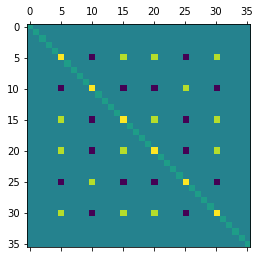

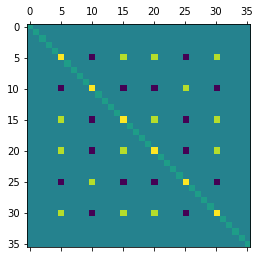

In [16]:
#check if the expansion equation holds
tr = ham11.reshape(36,36)
tr_sqrd = tr @ tr

expd = np.zeros((36,36))
for m in range(36):
    for n in range(36):
        expd += cmn[m,n] * np.kron(so6g[m], so6g[n])

print(np.allclose(tr_sqrd, expd))

plt.matshow(tr_sqrd)
plt.show()

plt.matshow(expd)
plt.show()

So far, we have 36 operators found and the expansion done. It is better to make all the operators except the identity to traceless and norm 2. For the off-diagonal operators, they are originally traceless, just multiply them by a constant to reach norm 2. For the diagonal matrices, we should do the Schmidt orthogonalization again. But let us write out all the operators for clarity first. The operators are represented by $\lambda$ and labeled by $m=0,1,2,...,35$ in consistant with python code. 

$$
\lambda^{0}=\frac{1}{\sqrt{3}}\left(\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & -1
\end{array}\right), \quad 
\lambda^{1}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{2}=\left(\begin{array}{cccccc}
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{3}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right),
\lambda^{4}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
$$

$$
\lambda^{5}=\frac{1}{\sqrt{6}}\left(\begin{array}{cccccc}
-2 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 2
\end{array}\right), \quad
\lambda^{6}=\left(\begin{array}{cccccc}
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{7}=\left(\begin{array}{cccccc}
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right),
\lambda^{8}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
-1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{9}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0
\end{array}\right), \quad
$$

$$
\lambda^{10}=\frac{1}{\sqrt{2}}\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right),
\lambda^{11}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), 
\lambda^{12}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
-1 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{13}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0
\end{array}\right), \quad
\lambda^{14}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
$$

$$
\lambda^{15}=\frac{1}{4}\left(\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{array}\right), \quad
\lambda^{16}=\frac{1}{4}\left(\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 & 0 & 0 \\
0 & 0 & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{array}\right), \quad
\lambda^{17}=\frac{1}{2}\left(\begin{array}{cccccc}
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{18}=\frac{1}{2}\left(\begin{array}{cccccc}
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{19}=\frac{1}{2}\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0
\end{array}\right), \quad
$$

$$
\lambda^{20}=\frac{1}{4}\left(\begin{array}{cccccc}
-1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & -1
\end{array}\right),
\lambda^{21}=\frac{1}{2}\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), 
\lambda^{22}=\frac{1}{2}\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0
\end{array}\right), \quad
\lambda^{23}=\frac{1}{2}\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{24}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
$$

$$
\lambda^{25}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{26}=\frac{1}{2}\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{27}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{28}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{29}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
$$

$$
\lambda^{30}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right),
\lambda^{31}=\frac{1}{2}\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), 
\lambda^{32}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{33}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{34}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{array}\right), \quad
\lambda^{35}=\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0
\end{array}\right). 
$$

As we can see, we should do the modification below to reach traceless and norm 2. 

1. The off-diagonal operators are multiplied by 2 or $\sqrt{2}$. 
2. The identity term $\lambda^{15}$ is multiplied by 4. 
3. Change 
    $$
    \lambda^{16}\rightarrow\frac{1}{\sqrt{6}}\left(\begin{array}{cccccc}
    2 & 0 & 0 & 0 & 0 & 0 \\
    0 & -1 & 0 & 0 & 0 & 0 \\
    0 & 0 & -1 & 0 & 0 & 0 \\
    0 & 0 & 0 & -1 & 0 & 0 \\
    0 & 0 & 0 & 0 & -1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 2
    \end{array}\right), \quad
    \lambda^{20}\rightarrow\frac{1}{\sqrt{2}}\left(\begin{array}{cccccc}
    0 & 0 & 0 & 0 & 0 & 0 \\
    0 & -1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & -1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0
    \end{array}\right). 
    $$

And then resolve all the coefficients with the full list of operators. 

True


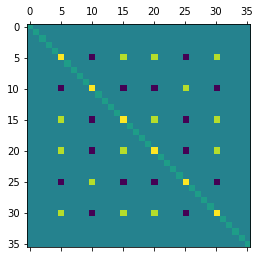

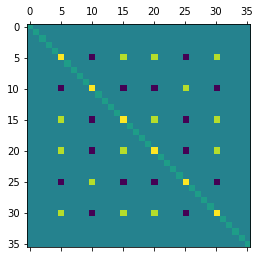

In [17]:
so6g_new = deepcopy(so6g)

for i in range(15,36):
    if i == 15:
        so6g_new[i] = np.diag([1,1,1,1,1,1])
    elif i == 16:
        so6g_new[i] = np.diag([2,-1,-1,-1,-1,2])/np.sqrt(6)
    elif i == 20:
        so6g_new[i] = np.diag([0,-1,1,1,-1,0])/np.sqrt(2)
    elif i == 17 or i == 18 or i == 19 or i == 21 or i == 22 or i == 23 or i == 26 or i == 31:
        so6g_new[i] *= 2
    else:
        so6g_new[i] *= np.sqrt(2)

coe_list_new = []

for a in range(1,5):
    for b in range(1,5):
        for c in range(1,5):
            for d in range(1,5):
                SiSi = su4g[(a,b)] @ su4g[(c,d)]
                Amat = np.zeros((36, len(so6g_new)))
                B = SiSi.reshape(-1,1)
                for l in range(len(so6g_new)):
                    Amat[:,l] = so6g_new[l].reshape(-1,1)[:,0]
                pcoe = LA.solve(Amat, B)
                coe_list_new.append(pcoe)

for i in range(len(coe_list_new)):
    coe_list_new[i] = coe_list_new[i].reshape(36)

def pvec_new(a,b,c,d):
    return coe_list_new[64*(a-1)+16*(b-1)+4*(c-1)+d-1]

cmn_new = np.zeros((36,36))

P = dict()
for a in range(1,5):
    for b in range(1,5):
        for c in range(1,5):
            for d in range(1,5):
                P[(a,b,c,d)] = pvec_new(a,b,c,d)

for m in range(36):
    for n in range(36):
        for a in range(1,5):
            for b in range(1,5):
                for c in range(1,5):
                    for d in range(1,5):
                        cmn_new[m,n] += P[(a,b,c,d)][m] * P[(b,a,d,c)][n]

expd_new = np.zeros((36,36))
for m in range(36):
    for n in range(36):
        expd_new += cmn_new[m,n] * np.kron(so6g_new[m], so6g_new[n])

print(np.allclose(tr_sqrd, expd_new))

plt.matshow(tr_sqrd)
plt.show()

plt.matshow(expd_new)
plt.show()